<a href="https://colab.research.google.com/github/xszaraz/oznal/blob/master/Copy_of_OZNAL_without_lenght_of_stay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = '/content/gdrive/My Drive/dataset'

In [3]:
!pip install pandas
!pip install numpy
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=bea21e8c8b412c28ad7ec176ae72800c8b5ffde7ee6af4189a5c7649b0150fd6
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import math as mth

hospital_df = pd.read_csv("/content/gdrive/My Drive/dataset/hospital.csv")
pd.set_option("display.max_columns",None)
pd.set_option('max_colwidth', 999)
hospital_df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases and Disorders",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


time: 18.6 s


In [5]:
hospital_df.loc[hospital_df['Total Costs'].between(0,10000), 'Total Costs'] = 1
hospital_df.loc[hospital_df['Total Costs'].between(10000.01,20000), 'Total Costs'] = 2
hospital_df.loc[hospital_df['Total Costs'] > 20000.01, 'Total Costs'] = 3

time: 111 ms


In [6]:
hospital_df['Total Costs'].value_counts()

1.0    1368957
2.0     548392
3.0     429582
Name: Total Costs, dtype: int64

time: 33 ms


In [7]:
hospital_df = hospital_df.drop(columns=['Length of Stay', 'Ethnicity','Health Service Area','Hospital County','Facility Name', 'Facility Id', 'Zip Code - 3 digits', 'Operating Certificate Number', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Total Charges'])

time: 236 ms


In [8]:
hospital_df

,Age Group,Gender,Race,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
0,70 or Older,F,White,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1.0
1,70 or Older,F,White,Elective,Hosp Basd Medicare Approved Swing Bed,Fluid and electrolyte disorders,NO PROC,Hypovolemia & related electrolyte disorders,"Endocrine, Nutritional and Metabolic Diseases and Disorders",Moderate,Moderate,Medical,0,N,Y,1.0
2,70 or Older,F,White,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),ELECTROCARDIOGRAM,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical,0,N,Y,1.0
3,50 to 69,F,White,Elective,Home or Self Care,Fluid and electrolyte disorders,NO PROC,"Other gastroenteritis, nausa & vomiting",Diseases and Disorders of the Digestive System,Moderate,Minor,Medical,0,N,Y,1.0
4,70 or Older,M,White,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,70 or Older,M,White,Emergency,Home or Self Care,Transient cerebral ischemia,NO PROC,Transient ischemia,Diseases and Disorders of the Nervous System,Moderate,Moderate,Medical,0,N,Y,1.0
2346927,50 to 69,M,White,Emergency,Home or Self Care,Gout and other crystal arthropathies,OT DX PRCS ON MUSC/SKEL,Other musculoskeletal system & connective tissue diagnoses,Diseases and Disorders of the Musculoskeletal System and Conn Tissue,Minor,Minor,Medical,0,N,Y,1.0
2346928,50 to 69,M,White,Urgent,Home or Self Care,Mood disorders,NO PROC,Major depressive disorders & other/unspecified psychoses,Mental Diseases and Disorders,Minor,Minor,Medical,0,N,N,1.0
2346929,70 or Older,M,White,Emergency,Home or Self Care,Cardiac dysrhythmias,NO PROC,Cardiac arrhythmia & conduction disorders,Diseases and Disorders of the Circulatory System,Minor,Moderate,Medical,0,N,Y,1.0


time: 26.5 ms


In [9]:
#check if some values contains null
hospital_df['Age Group'].isnull().values.any()
hospital_df['Gender'].isnull().values.any()
hospital_df['Race'].isnull().values.any()
hospital_df['Type of Admission'].isnull().values.any()
hospital_df['Patient Disposition'].isnull().values.any()
hospital_df['CCS Diagnosis Description'].isnull().values.any()
hospital_df['CCS Procedure Description'].isnull().values.any()
hospital_df['APR DRG Description'].isnull().values.any()
hospital_df['APR MDC Description'].isnull().values.any()
hospital_df['APR Medical Surgical Description'].isnull().values.any()
hospital_df['Birth Weight'].isnull().values.any()
hospital_df['Abortion Edit Indicator'].isnull().values.any()
hospital_df['Emergency Department Indicator'].isnull().values.any()
hospital_df['Total Costs'].isnull().values.any()

False

time: 1.09 s


In [10]:
#check how much values is missing
hospital_df['APR Severity of Illness Description'].isnull().sum()

111

time: 92.9 ms


In [11]:
#check how much values is missing
hospital_df['APR Risk of Mortality'].isnull().sum()

111

time: 95.7 ms


In [12]:
#check the rows with missing values 
hospital_df[hospital_df['APR Severity of Illness Description'].isnull()]

,Age Group,Gender,Race,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
73502,0 to 17,M,White,Newborn,Home w/ Home Health Services,Liveborn,CIRCUMCISION,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,2200,N,N,1.0
268463,0 to 17,M,Black/African American,Newborn,Short-term Hospital,Liveborn,RESP INTUB/MECH VENTIL,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,2200,N,N,1.0
269563,0 to 17,M,Black/African American,Newborn,Expired,Liveborn,NO PROC,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,1500,N,N,1.0
276090,0 to 17,M,Black/African American,Newborn,Expired,Liveborn,NO PROC,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,1200,N,N,1.0
311511,30 to 49,F,White,Emergency,Home or Self Care,Miscellaneous disorders,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104752,0 to 17,U,White,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3300,N,N,1.0
2105143,0 to 17,U,White,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3100,N,N,1.0
2105145,0 to 17,U,White,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3800,N,N,1.0
2105256,0 to 17,M,White,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3000,N,N,1.0


time: 114 ms


In [13]:
hospital_df['APR Severity of Illness Description'].unique()

array(['Moderate', 'Minor', 'Major', 'Extreme', nan], dtype=object)

time: 122 ms


In [14]:
hospital_df['APR Risk of Mortality'].unique()

array(['Minor', 'Moderate', 'Major', 'Extreme', nan], dtype=object)

time: 116 ms


In [15]:
#fill the NaN values 
hospital_df['APR Severity of Illness Description'].fillna( method ='ffill', inplace = True) 
hospital_df['APR Risk of Mortality'].fillna( method ='ffill', inplace = True) 

time: 208 ms


In [16]:
hospital_df['APR Severity of Illness Description'].isnull().values.any()
hospital_df['APR Risk of Mortality'].isnull().values.any()

False

time: 231 ms


In [17]:
hospital_df['CCS Diagnosis Description'].value_counts()

Liveborn                                     226910
Septicemia (except in labor)                 108910
Osteoarthritis                                63476
Congestive heart failure; nonhypertensive     58761
Mood disorders                                56976
                                              ...  
Birth trauma                                     51
Cataract                                         33
Osteoporosis                                     28
Contraceptive and procreative management         23
Female infertility                                8
Name: CCS Diagnosis Description, Length: 263, dtype: int64

time: 265 ms


In [18]:
#replace samples with counts lower than 3500 with Other 
keys = hospital_df['CCS Diagnosis Description'].value_counts().keys()

for i in keys:
    if hospital_df['CCS Diagnosis Description'][hospital_df['CCS Diagnosis Description'] == i].count() <= 3500:
        hospital_df['CCS Diagnosis Description'] = hospital_df['CCS Diagnosis Description'].replace(i, "Other") 
        
hospital_df['CCS Diagnosis Description'].value_counts()

Liveborn                                     226910
Other                                        203313
Septicemia (except in labor)                 108910
Osteoarthritis                                63476
Congestive heart failure; nonhypertensive     58761
                                              ...  
Skull and face fractures                       3717
Other acquired deformities                     3711
Poisoning by psychotropic agents               3704
Acute posthemorrhagic anemia                   3619
Fever of unknown origin                        3524
Name: CCS Diagnosis Description, Length: 115, dtype: int64

time: 41.1 s


In [19]:
hospital_df['APR DRG Description'].value_counts()

Neonate birthwt >2499g, normal newborn or neonate w other problem    198207
Vaginal delivery                                                     147000
Septicemia & disseminated infections                                  95079
Cesarean delivery                                                     76093
Heart failure                                                         56367
                                                                      ...  
Neonate w ECMO                                                           53
Extensive 3rd degree burns w skin graft                                  43
Neonate, transferred <5 days old, not born here                          35
Pancreas transplant                                                      33
Ungroupable                                                              24
Name: APR DRG Description, Length: 316, dtype: int64

time: 252 ms


In [20]:
#replace samples with counts lower than 3500 with Other 
keys = hospital_df['APR DRG Description'].value_counts().keys()

for i in keys:
    if hospital_df['APR DRG Description'][hospital_df['APR DRG Description'] == i].count() <= 3500:
        hospital_df['APR DRG Description'] = hospital_df['APR DRG Description'].replace(i, "Other") 
        
hospital_df['APR DRG Description'].value_counts()

Other                                                                233898
Neonate birthwt >2499g, normal newborn or neonate w other problem    198207
Vaginal delivery                                                     147000
Septicemia & disseminated infections                                  95079
Cesarean delivery                                                     76093
                                                                      ...  
Other skin, subcutaneous tissue & breast disorders                     3595
Major chest & respiratory trauma                                       3563
Connective tissue disorders                                            3547
Neonate birthwt >2499g w major anomaly                                 3546
Major male pelvic procedures                                           3503
Name: APR DRG Description, Length: 143, dtype: int64

time: 48.8 s


In [21]:
hospital_df['APR MDC Description'].value_counts()

Diseases and Disorders of the Circulatory System                                                        289506
Pregnancy, Childbirth and the Puerperium                                                                254102
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         231958
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    204684
Diseases and Disorders of the Digestive System                                                          197637
Diseases and Disorders of the Respiratory System                                                        196392
Diseases and Disorders of the Nervous System                                                            141879
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        131132
Mental Diseases and Disorders                                                                           116259
D

time: 241 ms


In [22]:
#We have 2 346 931 samples, but we dont want to predict on all of them because of the time its gonna take
 
#1368957 has value 1 and thats around 58 % of all samples from 2 346 931 samples
#548392 has value 2 and thats around 23 % all samples from 2 346 931 samples
#429582 has value 2 and thats around 19 %  all samples from 2 346 931 samples

#500 000 samples will form our new dataset for predicting and training
#290 000 samples in this new dataset will have value 1
#115 000 samples in this new dataset will have value 2
#95 000 samples in this new dataset will have value 3

#1000 samples will form our new dataset for finding best hyperparameters
#580 samples in this new dataset will have value 1
#230 samples in this new dataset will have value 1
#190 samples in this new dataset will have value 1

#for sample picking we will use dataset.sample()

dataset1 = hospital_df[hospital_df['Total Costs'] == 1]
to_merge1 = dataset1.sample(n = 290000)
to_hyperparameter1 = dataset1.sample(n = 580)
dataset2 = hospital_df[hospital_df['Total Costs'] == 2]
to_merge2 = dataset2.sample(n = 115000)
to_hyperparameter2 = dataset2.sample(n = 230)
dataset3 = hospital_df[hospital_df['Total Costs'] == 3]
to_merge3 = dataset3.sample(n = 95000)
to_hyperparameter3 = dataset3.sample(n = 190)

dataset_merged = pd.concat([to_merge1, to_merge2, to_merge3])
dataset_mergedhyperparameters = pd.concat([to_hyperparameter1, to_hyperparameter2, to_hyperparameter3])

time: 899 ms


In [23]:
#OneHotEncoding
dm_dummies1 = pd.get_dummies(dataset_merged['Age Group'])
dm_dummies2 = pd.get_dummies(dataset_merged['Gender'])
dm_dummies3 = pd.get_dummies(dataset_merged['Race'])
dm_dummies4 = pd.get_dummies(dataset_merged['Type of Admission'])
dm_dummies5 = pd.get_dummies(dataset_merged['Patient Disposition'])
dm_dummies6 = pd.get_dummies(dataset_merged['CCS Diagnosis Description'])
dm_dummies7 = pd.get_dummies(dataset_merged['CCS Procedure Description'])
dm_dummies8 = pd.get_dummies(dataset_merged['APR DRG Description'])
dm_dummies9 = pd.get_dummies(dataset_merged['APR MDC Description'])
dm_dummies10 = pd.get_dummies(dataset_merged['APR Severity of Illness Description'])
dm_dummies11 = pd.get_dummies(dataset_merged['APR Risk of Mortality'])
dm_dummies12 = pd.get_dummies(dataset_merged['APR Medical Surgical Description'])
dm_dummies13 = pd.get_dummies(dataset_merged['Abortion Edit Indicator'])
dm_dummies14 = pd.get_dummies(dataset_merged['Emergency Department Indicator'])

dmhp_dummies1 = pd.get_dummies(dataset_mergedhyperparameters['Age Group'])
dmhp_dummies2 = pd.get_dummies(dataset_mergedhyperparameters['Gender'])
dmhp_dummies3 = pd.get_dummies(dataset_mergedhyperparameters['Race'])
dmhp_dummies4 = pd.get_dummies(dataset_mergedhyperparameters['Type of Admission'])
dmhp_dummies5 = pd.get_dummies(dataset_mergedhyperparameters['Patient Disposition'])
dmhp_dummies6 = pd.get_dummies(dataset_mergedhyperparameters['CCS Diagnosis Description'])
dmhp_dummies7 = pd.get_dummies(dataset_mergedhyperparameters['CCS Procedure Description'])
dmhp_dummies8 = pd.get_dummies(dataset_mergedhyperparameters['APR DRG Description'])
dmhp_dummies9 = pd.get_dummies(dataset_mergedhyperparameters['APR MDC Description'])
dmhp_dummies10 = pd.get_dummies(dataset_mergedhyperparameters['APR Severity of Illness Description'])
dmhp_dummies11 = pd.get_dummies(dataset_mergedhyperparameters['APR Risk of Mortality'])
dmhp_dummies12 = pd.get_dummies(dataset_mergedhyperparameters['APR Medical Surgical Description'])
dmhp_dummies13 = pd.get_dummies(dataset_mergedhyperparameters['Abortion Edit Indicator'])
dmhp_dummies14 = pd.get_dummies(dataset_mergedhyperparameters['Emergency Department Indicator'])

time: 654 ms


In [24]:
#merging OneHotEncoding with the dataset from which OneHotEncodings were made
merged_df = pd.concat([dataset_merged, dm_dummies1, dm_dummies2, dm_dummies3, dm_dummies4, dm_dummies5, dm_dummies6, dm_dummies7, dm_dummies8, dm_dummies9, dm_dummies10, dm_dummies11, dm_dummies12, dm_dummies13, dm_dummies14], axis = 'columns')
merged_df_hp = pd.concat([dataset_mergedhyperparameters, dmhp_dummies1, dmhp_dummies2, dmhp_dummies3, dmhp_dummies4, dmhp_dummies5, dmhp_dummies6, dmhp_dummies7, dmhp_dummies8, dmhp_dummies9, dmhp_dummies10, dmhp_dummies11, dmhp_dummies12, dmhp_dummies13, dmhp_dummies14], axis = 'columns')

time: 1.65 s


In [25]:
#dropping the original columns from which OneHotEncodings were made and replacing 120 + with 120 for training and predictioning 
features = merged_df.drop(columns=['Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Abortion Edit Indicator', 'Emergency Department Indicator'])

features2 = merged_df_hp.drop(columns=['Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Abortion Edit Indicator', 'Emergency Department Indicator'])

time: 749 ms


In [26]:
# Labels are the values we want to predict
labels = np.array(features['Total Costs'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('Total Costs', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Labels2 are the values we want to predict
labels2 = np.array(features2['Total Costs'])
# Remove the labels from the features
# axis 1 refers to the columns
features2 = features2.drop('Total Costs', axis = 1)
# Saving feature names for later use
feature_list2 = list(features2.columns)
# Convert to numpy array
features2 = np.array(features2)

time: 2.55 s


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

time: 108 ms


In [28]:
#creating arrays for model comparising 
models = []
accuraccies = []
recalls = []
names = []
y_preds = []

time: 2.23 ms


In [29]:
#splitting datas for training, predicting and hyperparamaters searching
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size = 0.25, random_state = 42)

time: 3.05 s


In [30]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train2 = X_train2.astype(int)
X_test2 = X_test2.astype(int)
y_train2 = y_train2.astype(int)
y_test2 = y_test2.astype(int)

time: 1.71 s


In [31]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
print('Training2 Features Shape:', X_train2.shape)
print('Training2 Labels Shape:', y_train2.shape)
print('Testing2 Features Shape:', X_test2.shape)
print('Testing2 Labels Shape:', y_test2.shape)

Training Features Shape: (375000, 569)
Training Labels Shape: (375000,)
Testing Features Shape: (125000, 569)
Testing Labels Shape: (125000,)
Training2 Features Shape: (750, 447)
Training2 Labels Shape: (750,)
Testing2 Features Shape: (250, 447)
Testing2 Labels Shape: (250,)
time: 3.15 ms


In [32]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

time: 179 ms


In [33]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

time: 3.42 ms


In [0]:
#GridSearchCV for RandomForestClassifier parameters

#The number of trees in the forest
n_estimators = [100, 300,700, 1200]
#The maximum depth of the tree
max_depth = [5, 10, 20, 40]
#The minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10, 30, 100]
#The minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 5, 10]


param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

rf_grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
rf_grid.fit(X_train2, y_train2)
print(rf_grid.best_params_)

In [34]:
#RandomForestClassifier without optimalization
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.687216, Recall(micro):0.687216

time: 3min 58s


In [35]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.87      0.82     72374
           2       0.44      0.33      0.37     28793
           3       0.63      0.56      0.59     23833

    accuracy                           0.69    125000
   macro avg       0.61      0.59      0.59    125000
weighted avg       0.67      0.69      0.67    125000

[[63098  6677  2599]
 [14063  9358  5372]
 [ 4971  5416 13446]]
time: 293 ms


In [36]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Medical, Importance: 0.04
Variable: Surgical, Importance: 0.04
Variable: NO PROC, Importance: 0.03
Variable: Minor, Importance: 0.03
Variable: 50 to 69, Importance: 0.02
Variable: F, Importance: 0.02
Variable: M, Importance: 0.02
Variable: Other Race, Importance: 0.02
Variable: White, Importance: 0.02
Variable: Home or Self Care, Importance: 0.02
Variable: Extreme, Importance: 0.02
Variable: Major, Importance: 0.02
Variable: Minor, Importance: 0.02
Variable: Moderate, Importance: 0.02
Variable: Birth Weight, Importance: 0.01
Variable: 0 to 17, Importance: 0.01
Variable: 18 to 29, Importance: 0.01
Variable: 30 to 49, Importance: 0.01
Variable: 70 or Older, Importance: 0.01
Variable: Black/African American, Importance: 0.01
Variable: Elective, Importance: 0.01
Variable: Emergency, Importance: 0.01
Variable: Urgent, Importance: 0.01
Variable: Home w/ Home Health Services, Importance: 0.01
Variable: Inpatient Rehabilitation Facility, Importance: 0.01
Variable: Skilled Nursing Hom

In [37]:
models.append('RF')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 1.15 ms


In [38]:
# RandomForestClassifier with GridSearchCV
clf_grid = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth = 20, min_samples_leaf = 1)
clf_grid.fit(X_train, y_train)
y_pred = clf_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.69936, Recall(micro):0.69936

time: 2min 10s


In [39]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      0.95      0.82     72374
           2       0.53      0.19      0.28     28793
           3       0.68      0.54      0.60     23833

    accuracy                           0.70    125000
   macro avg       0.64      0.56      0.57    125000
weighted avg       0.67      0.70      0.66    125000

[[68841  1951  1582]
 [18651  5599  4543]
 [ 7878  2975 12980]]
time: 284 ms


In [40]:
# Get numerical feature importances
importances = list(clf_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Medical, Importance: 0.09
Variable: Surgical, Importance: 0.08
Variable: Extreme, Importance: 0.05
Variable: Home or Self Care, Importance: 0.04
Variable: NO PROC, Importance: 0.04
Variable: Minor, Importance: 0.04
Variable: Minor, Importance: 0.04
Variable: Major, Importance: 0.03
Variable: Extreme, Importance: 0.03
Variable: Birth Weight, Importance: 0.02
Variable: Neonate birthwt >2499g, normal newborn or neonate w other problem, Importance: 0.02
Variable: Diseases and Disorders of the Musculoskeletal System and Conn Tissue, Importance: 0.02
Variable: Pregnancy, Childbirth and the Puerperium, Importance: 0.02
Variable: Moderate, Importance: 0.02
Variable: Major, Importance: 0.02
Variable: 0 to 17, Importance: 0.01
Variable: 50 to 69, Importance: 0.01
Variable: 70 or Older, Importance: 0.01
Variable: F, Importance: 0.01
Variable: M, Importance: 0.01
Variable: Black/African American, Importance: 0.01
Variable: Other Race, Importance: 0.01
Variable: White, Importance: 0.01
Va

In [41]:
models.append('RF_grid')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 1.83 ms


In [42]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

time: 1.23 ms


In [43]:
clf_gbm = GradientBoostingClassifier()
clf_gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

time: 7.17 ms


In [0]:
#GridSearchCV for GradientBoostingClassifier

#Loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs
loss = ['deviance']
#Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators
learning_rate = [1, 0.85, 0.5, 0.2, 0.05]
#The number of boosting stages to perform
n_estimators = [ 32, 64, 100, 200, 500]
#Maximum depth of the individual regression estimators
max_depth = [4, 6, 8, 10]
#The fraction of samples to be used for fitting the individual base learners
subsample = [0.6, 0.75, 0.85,0.9]

param_grid = {'loss': loss,
              'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'subsample': subsample}

gbm_grid = GridSearchCV(estimator=clf_gbm, param_grid=param_grid, cv=5)
gbm_grid.fit(X_train2, y_train2)
print(gbm_grid.best_params_)

In [44]:
#GradientBoosting without optimalization
clf_gbm.fit(X_train, y_train)
y_pred = clf_gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.697352, Recall(micro):0.697352

time: 43min


In [45]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.93      0.82     72374
           2       0.47      0.27      0.34     28793
           3       0.68      0.52      0.59     23833

    accuracy                           0.70    125000
   macro avg       0.63      0.57      0.59    125000
weighted avg       0.67      0.70      0.67    125000

[[67020  3782  1572]
 [16819  7785  4189]
 [ 6589  4880 12364]]
time: 290 ms


In [46]:
# Get numerical feature importances
importances = list(clf_gbm.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Surgical, Importance: 0.27
Variable: Extreme, Importance: 0.11
Variable: Minor, Importance: 0.09
Variable: Home or Self Care, Importance: 0.06
Variable: NO PROC, Importance: 0.06
Variable: Minor, Importance: 0.06
Variable: Pregnancy, Childbirth and the Puerperium, Importance: 0.05
Variable: Neonate birthwt >2499g, normal newborn or neonate w other problem, Importance: 0.03
Variable: Major, Importance: 0.03
Variable: Moderate, Importance: 0.02
Variable: White, Importance: 0.01
Variable: Left Against Medical Advice, Importance: 0.01
Variable: Skilled Nursing Home, Importance: 0.01
Variable: Osteoarthritis, Importance: 0.01
Variable: SPINAL FUSION, Importance: 0.01
Variable: Dorsal & lumbar fusion proc except for curvature of back, Importance: 0.01
Variable: Rehabilitation, Importance: 0.01
Variable: Schizophrenia, Importance: 0.01
Variable: Vaginal delivery, Importance: 0.01
Variable: Diseases and Disorders of the Circulatory System, Importance: 0.01
Variable: Diseases and Diso

In [47]:
models.append('GB')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 4.35 ms


In [48]:
#GradientBoosting with GridSearchCV 
clf_gbm_grid = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance',  max_depth = 6, n_estimators = 64, subsample = 0.75)
clf_gbm_grid.fit(X_train, y_train)
y_pred = clf_gbm_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.700512, Recall(micro):0.700512

time: 35min 11s


In [49]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.93      0.83     72374
           2       0.48      0.26      0.34     28793
           3       0.68      0.54      0.60     23833

    accuracy                           0.70    125000
   macro avg       0.63      0.58      0.59    125000
weighted avg       0.67      0.70      0.67    125000

[[67247  3489  1638]
 [16786  7564  4443]
 [ 6471  4609 12753]]
time: 293 ms


In [50]:
# Get numerical feature importances
importances = list(clf_gbm_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Surgical, Importance: 0.26
Variable: Minor, Importance: 0.12
Variable: Extreme, Importance: 0.11
Variable: Pregnancy, Childbirth and the Puerperium, Importance: 0.06
Variable: Home or Self Care, Importance: 0.05
Variable: NO PROC, Importance: 0.05
Variable: Major, Importance: 0.04
Variable: Minor, Importance: 0.04
Variable: White, Importance: 0.02
Variable: Neonate birthwt >2499g, normal newborn or neonate w other problem, Importance: 0.02
Variable: Left Against Medical Advice, Importance: 0.01
Variable: Skilled Nursing Home, Importance: 0.01
Variable: Osteoarthritis, Importance: 0.01
Variable: SPINAL FUSION, Importance: 0.01
Variable: Alcohol & drug dependence w rehab or rehab/detox therapy, Importance: 0.01
Variable: Appendectomy, Importance: 0.01
Variable: Dorsal & lumbar fusion proc except for curvature of back, Importance: 0.01
Variable: Other, Importance: 0.01
Variable: Rehabilitation, Importance: 0.01
Variable: Schizophrenia, Importance: 0.01
Variable: Diseases and Dis

In [51]:
models.append('GB_grid')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 1.21 ms


In [52]:
#MLogisticRegression 
from sklearn import linear_model

time: 1.25 ms


In [53]:
lr = linear_model.LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

time: 5.62 ms


In [0]:
#GridSearch for LogisticRegression

#Used to specify the norm used in the penalization
penalty = ['l1', 'l2']
#Inverse of regularization strength
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
#Algorithm to use in the optimization problem, saga because it can handle both l1 and l2 penalty
solver = ['liblinear','saga']
#For multinomial the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary
multi_class = ['ovr']

param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver,
                  multi_class=multi_class)

mlr_grid = GridSearchCV(estimator = lr, param_grid=param_grid, verbose=1, n_jobs=-1, cv=5)
mlr_grid.fit(X_train2, y_train2)
print(mlr_grid.best_params_)

In [54]:
#lLogisticRegression without optimization
ovr_lr = linear_model.LogisticRegression(multi_class = 'ovr')
ovr_lr.fit(X_train, y_train)
y_pred = ovr_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.687272, Recall(micro):0.687272

time: 2min 4s


In [55]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.93      0.82     72374
           2       0.48      0.19      0.27     28793
           3       0.61      0.57      0.58     23833

    accuracy                           0.69    125000
   macro avg       0.61      0.56      0.56    125000
weighted avg       0.65      0.69      0.65    125000

[[67061  2445  2868]
 [17520  5375  5898]
 [ 6903  3457 13473]]
time: 285 ms


In [56]:
models.append('OVR_lr')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.46 ms


In [57]:
#lLogisticRegression with optimization
ovr_lr_grid = linear_model.LogisticRegression(multi_class = 'ovr', penalty = 'l2', solver = 'liblinear', C = 0.1)
ovr_lr_grid.fit(X_train, y_train)
y_pred = ovr_lr_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.70464, Recall(micro):0.70464

time: 19.6 s


In [58]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.93      0.83     72374
           2       0.50      0.25      0.33     28793
           3       0.65      0.58      0.61     23833

    accuracy                           0.70    125000
   macro avg       0.63      0.59      0.59    125000
weighted avg       0.67      0.70      0.67    125000

[[66965  3148  2261]
 [16305  7188  5300]
 [ 5759  4147 13927]]
time: 294 ms


In [59]:
models.append('OVR_lr_grid')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 1.76 ms


In [60]:
!pip install mord

  Created wheel for mord: filename=mord-0.6-cp36-none-any.whl size=6008 sha256=43334febd531c15787b501abb0a9517f858589e3e7f2cf945bf5cf2e1037b2cc
  Stored in directory: /root/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord
time: 15.2 s


In [61]:
import mord as m

time: 5.12 ms


In [62]:
ord_lr = m.LogisticIT()
ord_lr.fit(X_train, y_train)
y_pred = ord_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.695728, Recall(micro):0.695728

time: 34min 32s


In [63]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83     72374
           2       0.42      0.22      0.29     28793
           3       0.63      0.61      0.62     23833

    accuracy                           0.70    125000
   macro avg       0.60      0.58      0.58    125000
weighted avg       0.66      0.70      0.67    125000

[[65947  4393  2034]
 [15683  6478  6632]
 [ 4911  4381 14541]]
time: 302 ms


In [64]:
models.append('ORD_lr')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.75 ms


In [65]:
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle

time: 102 ms


In [66]:
len(models)

7

time: 3.94 ms


In [67]:
index = accuraccies.index(max(accuraccies))

time: 1.29 ms


In [68]:
y_pred_best = y_preds[index]

time: 1.02 ms


In [69]:
best_model = models[index]
best_model 

'OVR_lr_grid'

time: 2.22 ms


In [70]:
for i in range(len(models)):
    print("Model: " + models[i] + ", Accuracy: " + str(accuraccies[i]) + ", Recall(micro): " + str(recalls[i]))

Model: RF, Accuracy: 0.687216, Recall(micro): 0.687216
Model: RF_grid, Accuracy: 0.69936, Recall(micro): 0.69936
Model: GB, Accuracy: 0.697352, Recall(micro): 0.697352
Model: GB_grid, Accuracy: 0.700512, Recall(micro): 0.700512
Model: OVR_lr, Accuracy: 0.687272, Recall(micro): 0.687272
Model: OVR_lr_grid, Accuracy: 0.70464, Recall(micro): 0.70464
Model: ORD_lr, Accuracy: 0.695728, Recall(micro): 0.695728
time: 3.67 ms


In [71]:
#This is needed for ROC curve
y_test_roc = label_binarize(y_test, classes=[1, 2, 3])
y_pred_roc = label_binarize(y_pred_best, classes=[1, 2, 3])

time: 34.6 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


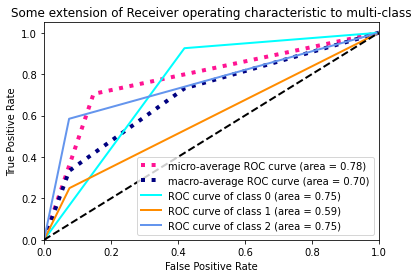

time: 382 ms


In [72]:
# Compute ROC curve and ROC area for each class
# Vypocitanie ROC curve a ROC oblasti pre kazdu triedu
lw = 2
n_classes = y_test_roc.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_pred_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

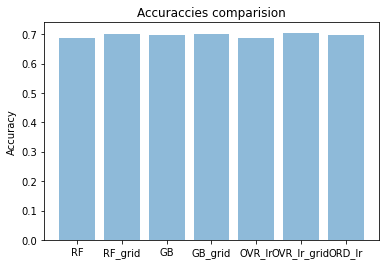

time: 147 ms


In [73]:
objects = np.array(models)  
y_pos = np.arange(len(objects))
performance = np.array(accuraccies)  

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuraccies comparision')

plt.show()

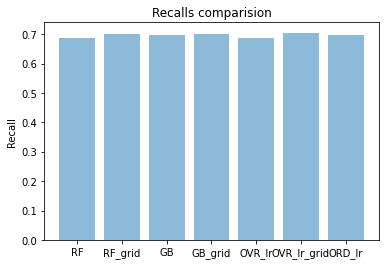

time: 148 ms


In [74]:
objects = np.array(models)  
y_pos = np.arange(len(objects))
performance = np.array(recalls)  

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Recall')
plt.title('Recalls comparision')

plt.show()

In [75]:
#colleration
df = hospital_df
df['Age Group']=df['Age Group'].astype('category').cat.codes
df['Gender']=df['Gender'].astype('category').cat.codes
df['Race']=df['Race'].astype('category').cat.codes
df['Type of Admission']=df['Type of Admission'].astype('category').cat.codes
df['Patient Disposition']=df['Patient Disposition'].astype('category').cat.codes
df['CCS Diagnosis Description']=df['CCS Diagnosis Description'].astype('category').cat.codes
df['CCS Procedure Description']=df['CCS Procedure Description'].astype('category').cat.codes
df['APR DRG Description']=df['APR DRG Description'].astype('category').cat.codes
df['APR MDC Description']=df['APR MDC Description'].astype('category').cat.codes
df['APR Severity of Illness Description']=df['APR Severity of Illness Description'].astype('category').cat.codes
df['APR Risk of Mortality']=df['APR Risk of Mortality'].astype('category').cat.codes
df['APR Medical Surgical Description']=df['APR Medical Surgical Description'].astype('category').cat.codes
df['Abortion Edit Indicator']=df['Abortion Edit Indicator'].astype('category').cat.codes
df['Emergency Department Indicator']=df['Emergency Department Indicator'].astype('category').cat.codes
df.corr()

,Age Group,Gender,Race,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
Age Group,1.000000,0.017589,0.109866,-0.183502,0.304007,-0.064206,-0.044393,-0.059856,-0.443662,-0.143921,-0.085958,0.115604,-0.573748,-0.026122,0.334384,0.270794
Gender,0.017589,1.000000,0.008669,-0.013713,0.002731,-0.065703,-0.040178,-0.081024,-0.182279,-0.040769,-0.014531,-0.037798,0.053722,-0.035964,0.061306,0.064547
Race,0.109866,0.008669,1.000000,-0.003205,0.046578,0.003330,-0.023624,-0.014077,-0.007324,-0.020121,-0.021813,0.067196,0.004674,-0.022287,-0.057043,-0.024355
Type of Admission,-0.183502,-0.013713,-0.003205,1.000000,-0.054445,-0.013822,0.049766,0.053687,0.164841,-0.023128,-0.017874,-0.156367,0.212815,0.003644,-0.136756,-0.105571
Patient Disposition,0.304007,0.002731,0.046578,-0.054445,1.000000,-0.005912,-0.007296,-0.023234,-0.115835,-0.143579,-0.088793,0.025443,-0.130548,-0.015527,0.134025,0.198658
CCS Diagnosis Description,-0.064206,-0.065703,0.003330,-0.013822,-0.005912,1.000000,0.080938,0.340883,0.328204,-0.012063,-0.061369,-0.070668,-0.028189,0.008429,-0.055790,-0.009586
CCS Procedure Description,-0.044393,-0.040178,-0.023624,0.049766,-0.007296,0.080938,1.000000,0.236824,0.156697,-0.063750,-0.063392,-0.158286,0.054294,-0.002014,0.064667,0.008623
APR DRG Description,-0.059856,-0.081024,-0.014077,0.053687,-0.023234,0.340883,0.236824,1.000000,0.294251,-0.075073,-0.066242,-0.131892,0.032509,0.013523,-0.058202,-0.022072
APR MDC Description,-0.443662,-0.182279,-0.007324,0.164841,-0.115835,0.328204,0.156697,0.294251,1.000000,0.018795,-0.025147,-0.116485,0.371177,0.062213,-0.307155,-0.164366
APR Severity of Illness Description,-0.143921,-0.040769,-0.020121,-0.023128,-0.143579,-0.012063,-0.063750,-0.075073,0.018795,1.000000,0.503532,0.014276,0.021091,0.012316,-0.104090,-0.281614


time: 4.89 s
